# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [31]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [83]:
def GUC_Distance(Cluster_Centroids, Data_points, Distance_Type):
    if Distance_Type == 'e':
        # Euclidean distance calculation
        centroids_expanded = Cluster_Centroids[:, np.newaxis, :]
        distances = np.sqrt(np.sum((centroids_expanded - Data_points) ** 2, axis=2))
        return distances  # return the calculated distances
    elif Distance_Type == 'p':
        # Pearson correlation distance calculation
        centroids_mean = np.mean(Cluster_Centroids, axis=1, keepdims=True)
        data_mean = np.mean(Data_points, axis=0, keepdims=True)
        centroids_centered = Cluster_Centroids - centroids_mean
        data_centered = Data_points - data_mean
        centroids_norm = np.linalg.norm(centroids_centered, axis=1, keepdims=True)
        data_norm = np.linalg.norm(data_centered, axis=0, keepdims=True)
        centroids_norm = centroids_norm.T  # Transpose to match the shape of data_norm
        data_norm = data_norm.T  # Transpose data_norm to (3, 1)
        correlation = np.dot(data_centered, centroids_centered.T) / (centroids_norm * data_norm)
        distances = 1 - correlation  # calculate distances
        return distances  # return the calculated distances
    else:
        raise ValueError("Distance_Type must be either 'e' or 'p'.")


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [154]:
def GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type, tol=1e-4):
    # Your existing code here

    def find_data_ranges(data):
        num_columns = data.shape[1]
        ranges = []
        for i in range(num_columns):
            column_data = data[:, i]
            min_value = np.min(column_data)
            max_value = np.max(column_data)
            column_range = max_value - min_value
            ranges.append(column_range)
        return np.array(ranges)

    def generate_cluster_heads(data, k):
        """
        Generate initial cluster heads randomly within the data ranges.
        """
        num_features = data.shape[1]
        ranges = find_data_ranges(data)
        cluster_heads = []
        for _ in range(k):
            cluster_head = []
            for i in range(num_features):
                feature_range = ranges[i]
                min_val = np.min(data[:, i])
                cluster_head.append(np.random.uniform(min_val, min_val + feature_range))
            cluster_heads.append(cluster_head)
            print(cluster_heads)
        return np.array(cluster_heads)
    
    def cluster_assignment(data_points, cluster_heads, distance_type):
        """
        Assign data points to the nearest cluster centroids and calculate mean square distances.
        """
        distances = GUC_Distance(cluster_heads, data_points, distance_type)
        assignments = np.argmin(distances, axis=0)

        mean_square_distances = np.zeros_like(assignments, dtype=float)  # Initialize array
        for i in range(len(assignments)):
            mean_square_distances[i] = np.sum((data_points[i] - cluster_heads[assignments[i]]) ** 2)

        return assignments, mean_square_distances

    
    def update_centroids(data_points, assignments, num_clusters):
        """
        Update cluster centroids based on the mean of the data points assigned to each cluster.
        """
        new_centroids = []
        for cluster_index in range(num_clusters):
            cluster_points = data_points[assignments == cluster_index]
            if len(cluster_points) > 0:
                centroid = np.mean(cluster_points, axis=0)
                new_centroids.append(centroid)
            else:
                # If no points are assigned to the cluster, retain the previous centroid
                new_centroids.append(cluster_heads[cluster_index])
        return np.array(new_centroids)

    # Initialize cluster heads
    cluster_heads = generate_cluster_heads(Data_points, Number_of_Clusters)

    # Initialize previous distortion for comparison
    prev_distortion = float('inf')

    while True:
        # Cluster assignment step
        assignments, mean_square_distances = cluster_assignment(Data_points, cluster_heads, Distance_Type)

        # Update centroids step
        new_centroids = update_centroids(Data_points, assignments, Number_of_Clusters)

        # Calculate total distortion
        total_distortion = np.sum(mean_square_distances)

        # Stopping condition
        if abs(prev_distortion - total_distortion) < tol:
            break

        # Update centroids for next iteration
        cluster_heads = new_centroids
        prev_distortion = total_distortion

    # Final cluster distance and cluster metric
    Final_Cluster_Distance = mean_square_distances
    Cluster_Metric = total_distortion

    return Final_Cluster_Distance, Cluster_Metric


#---------------------------TESTING----------------------------------------
np.random.seed(0)  # for reproducibility
num_samples = 100
num_features = 2
Data_points = np.random.randn(num_samples, num_features)  # Using random normal distribution for simplicity

# Number of clusters
Number_of_Clusters = 3

# Distance type
Distance_Type = 'e'

# Perform K-means clustering
Final_Cluster_Distance, Cluster_Metric = GUC_Kmean(Data_points, Number_of_Clusters, 'e')

# Display results
print("Final Cluster Distance:", Final_Cluster_Distance)
print("Cluster Metric (Distortion Function):", Cluster_Metric)


[[2.1952576163636843, -0.9191700142863548]]
[[2.1952576163636843, -0.9191700142863548], [-1.3642265448578408, -1.7756612716984463]]
[[2.1952576163636843, -0.9191700142863548], [-1.3642265448578408, -1.7756612716984463], [-2.4718909528952473, 1.9262911852743447]]
Final Cluster Distance: [4.86891610e-01 3.95182514e+00 2.13808406e+00 1.82880726e-01
 9.01800792e-01 1.01487056e+00 1.20580497e-01 4.12555560e-01
 3.82619514e-01 6.14944372e-01 3.29168310e+00 1.04266493e+00
 4.33623949e+00 5.65710599e-01 1.67688146e+00 8.73345386e-01
 1.71709698e+00 8.18820388e-01 9.18507785e-01 1.98345874e-01
 8.03733737e-01 1.62157958e+00 9.40643539e-02 3.02257622e-01
 1.60395469e+00 4.77780958e-01 1.95394357e-01 9.86993679e-01
 1.03219900e+00 1.72597860e-01 1.89547555e-01 1.09303492e+00
 5.25279934e-01 1.07913998e+00 8.26522278e-01 1.40166598e-01
 2.22481119e+00 7.51903018e-01 1.92698554e-01 6.58705704e-01
 1.71458526e-01 1.49441499e+00 2.85598337e+00 1.99186068e-01
 8.07369148e-02 1.70703830e-01 9.99230199e

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [34]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [35]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [179]:
def display_cluster_ND(X, km=[], num_clusters=0):
    color = 'brgcmyk'  # List of colors
    alpha = 0.5  # Color opacity
    s = 20  # Marker size

    num_dimensions = X.shape[1]  # Get the number of dimensions

    if num_dimensions == 2:
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.set_title('Dimensions 1 vs 2')
        if num_clusters == 0:
            ax.scatter(X[:, 0], X[:, 1], c='b', alpha=alpha, s=s)
        else:
            for k in range(num_clusters):
                ax.scatter(X[km == k, 0], X[km == k, 1], c=color[k], alpha=alpha, s=s)
    else:
        fig, axs = plt.subplots(num_dimensions - 1, num_dimensions - 1, figsize=(15, 15))
        for i in range(num_dimensions - 1):
            for j in range(i + 1, num_dimensions):
                ax = axs[i, j-1]  # Select the subplot
                ax.set_title(f'Dimensions {i+1} vs {j+1}')  # Set subplot title
                if num_clusters == 0:
                    ax.scatter(X[:, i], X[:, j], c='b', alpha=alpha, s=s)
                else:
                    for k in range(num_clusters):
                        ax.scatter(X[km == k, i], X[km == k, j], c=color[k], alpha=alpha, s=s)

    plt.tight_layout()
    plt.show()

[[100000555.40320234, 0.52437981107722, 0.11738029417055718, 27.271026637543095, 0.14041906413656624, 301358.1130039367, 0.0077207030205221905, 0.3571599361153126]]
[[100000555.40320234, 0.52437981107722, 0.11738029417055718, 27.271026637543095, 0.14041906413656624, 301358.1130039367, 0.0077207030205221905, 0.3571599361153126], [100001226.12063949, 0.0813695988533053, 0.8818965030968323, 59.73796915485271, 2.8991699143136804, 174686.5665078609, 0.6008073663169744, 1.0990011455905428]]
[[100000555.40320234, 0.52437981107722, 0.11738029417055718, 27.271026637543095, 0.14041906413656624, 301358.1130039367, 0.0077207030205221905, 0.3571599361153126], [100001226.12063949, 0.0813695988533053, 0.8818965030968323, 59.73796915485271, 2.8991699143136804, 174686.5665078609, 0.6008073663169744, 1.0990011455905428], [100001861.70661588, 0.5207614372418605, 0.26720703186231864, 68.88912977209894, 1.115756245537384, 36210.390491926235, 0.4953700449846319, 0.6364670183541248]]


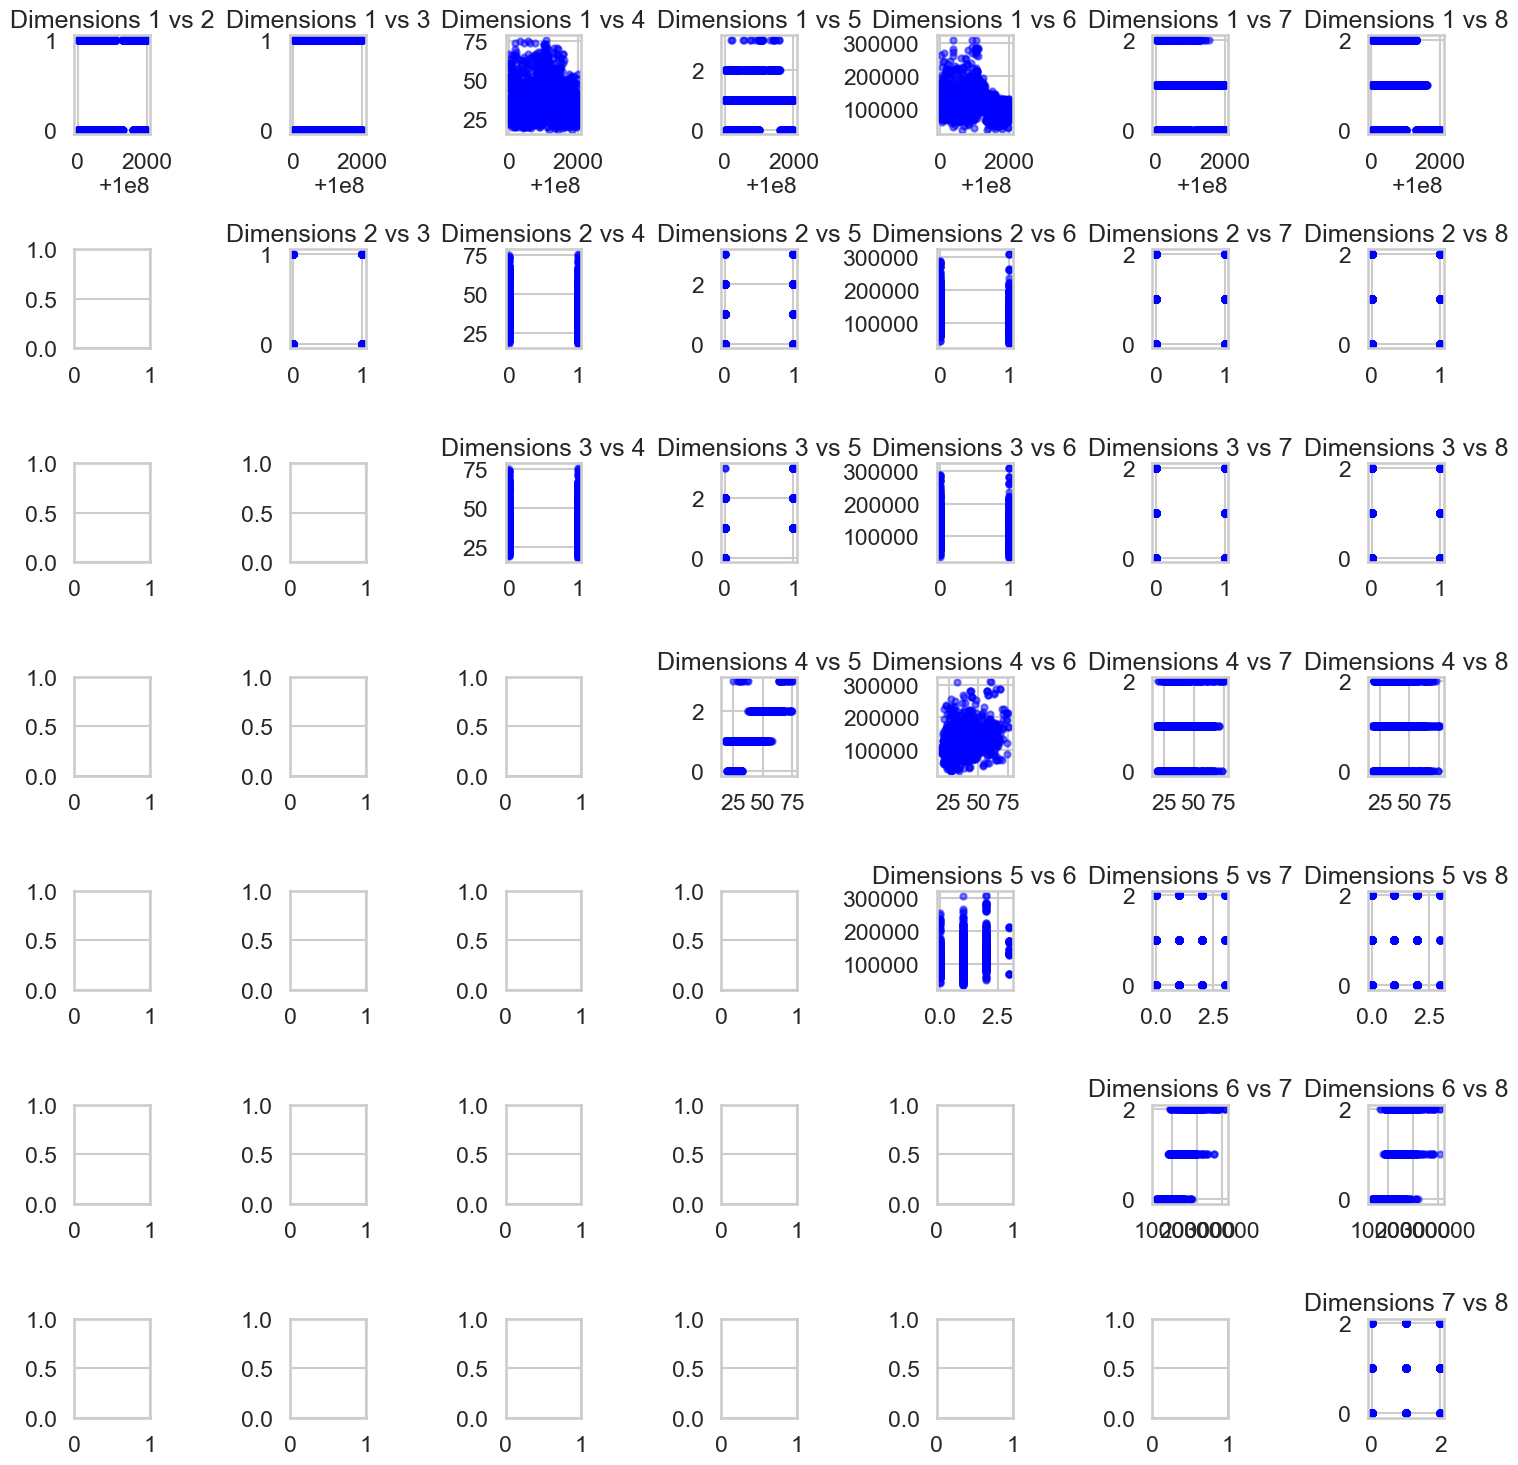

In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
  # Import your GUC-KMeans implementation

# # Load your dataset
data = pd.read_csv('Customer data.csv')

# # Convert the data array back to a DataFrame (if necessary)
# data_df = pd.DataFrame(data, columns=data.columns)

# # Visualize the data with a pairplot
# sns.pairplot(data_df)
# plt.show()

# Extract features from the dataset
X = data.values

# Perform GUC-KMeans clustering
num_clusters = 3  # Specify the number of clusters
distance_type = 'e'  # Specify the distance type ('e' for Euclidean, 'p' for Pearson correlation, etc.)
Final_Cluster_Distance, Cluster_Metric = GUC_Kmean(X, num_clusters, distance_type)

# Extract cluster assignments
assignments = np.argmin(Final_Cluster_Distance, axis=0)

# Call the display_cluster function
display_cluster_ND(X, km=[], num_clusters=0)


> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

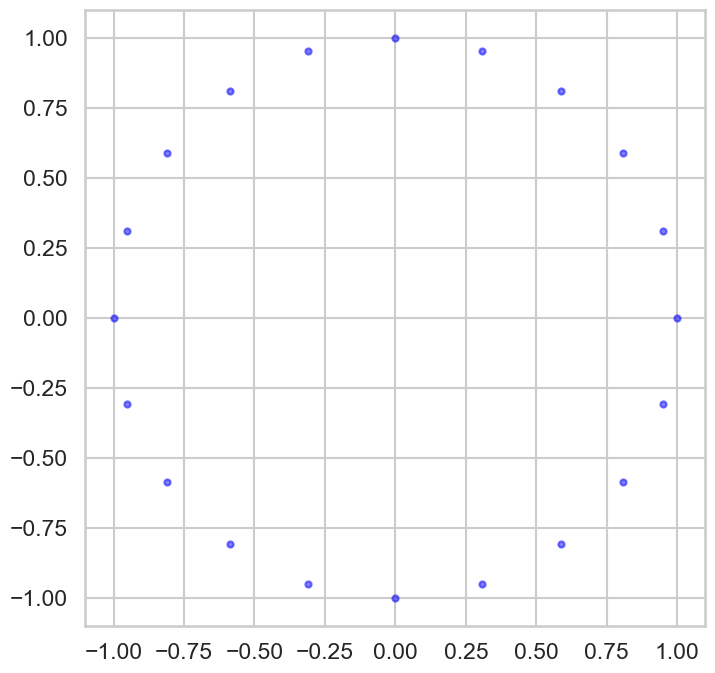

In [37]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X1)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

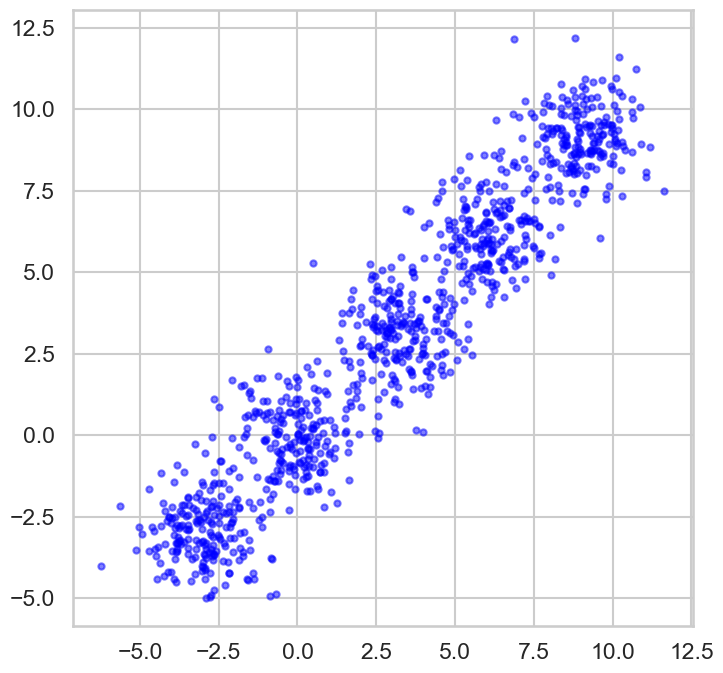

In [38]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X2)

#### 2.3. Example 3 : moons Data Gen and display 

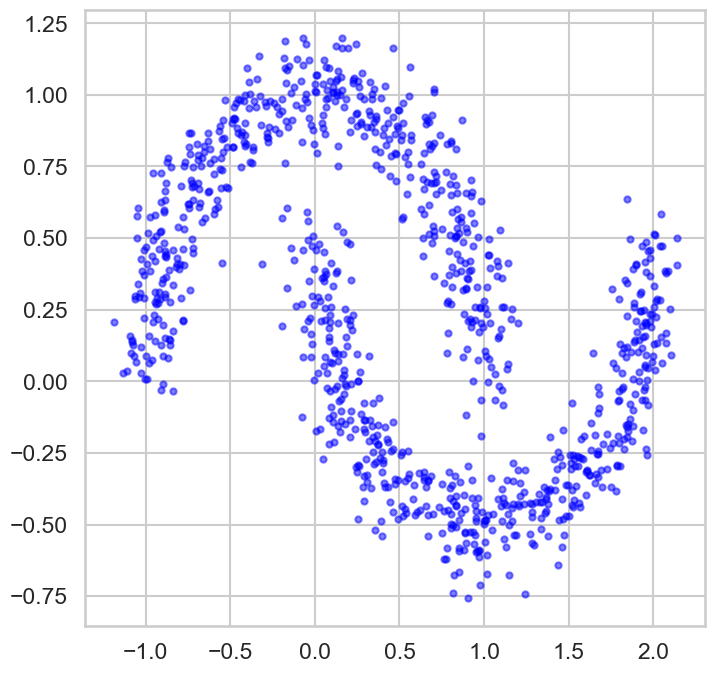

In [39]:
n_samples = 1000
X3, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X3)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

Clustering Ex. 1 with 2 clusters...
[[-0.9687878711063436, -0.14240855500352434]]
[[-0.9687878711063436, -0.14240855500352434], [-0.8638518520505596, -0.4961180235078142]]
Clustering Ex. 1 with 3 clusters...
[[-0.5576781693078323, -0.49361761255429615]]
[[-0.5576781693078323, -0.49361761255429615], [-0.7378895375694845, -0.9759275542046915]]
[[-0.5576781693078323, -0.49361761255429615], [-0.7378895375694845, -0.9759275542046915], [-0.7690314057225038, 0.23696051902549575]]
Clustering Ex. 1 with 4 clusters...
[[0.9485124256361006, 0.9806900031217878]]
[[0.9485124256361006, 0.9806900031217878], [-0.18189180925387682, -0.6740911479067893]]
[[0.9485124256361006, 0.9806900031217878], [-0.18189180925387682, -0.6740911479067893], [0.2775235147330586, -0.019389306902525716]]
[[0.9485124256361006, 0.9806900031217878], [-0.18189180925387682, -0.6740911479067893], [0.2775235147330586, -0.019389306902525716], [0.9788195545688629, -0.8693915856964396]]
Clustering Ex. 1 with 5 clusters...
[[0.566468

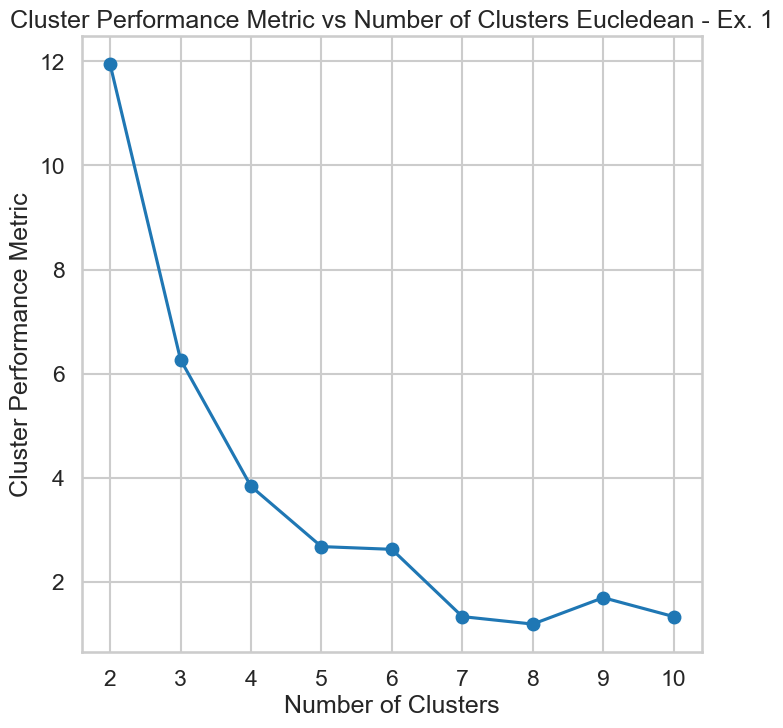

Clustering Ex. 2 with 2 clusters...
[[5.853742428014355, 10.118279101160194]]
[[5.853742428014355, 10.118279101160194], [3.482746669812883, -0.13059767000528755]]
Clustering Ex. 2 with 3 clusters...
[[-5.700491286350464, 7.216498337571467]]
[[-5.700491286350464, 7.216498337571467], [-6.100255334100418, 1.4153096157724452]]
[[-5.700491286350464, 7.216498337571467], [-6.100255334100418, 1.4153096157724452], [3.247714734611913, 10.8549297907764]]
Clustering Ex. 2 with 4 clusters...
[[-4.640602748992725, 1.9867947896690223]]
[[-4.640602748992725, 1.9867947896690223], [-5.806410915495816, 0.8987195667042593]]
[[-4.640602748992725, 1.9867947896690223], [-5.806410915495816, 0.8987195667042593], [4.8877151357528685, -0.19299277946542315]]
[[-4.640602748992725, 1.9867947896690223], [-5.806410915495816, 0.8987195667042593], [4.8877151357528685, -0.19299277946542315], [-2.489761398892472, -2.999709094835161]]
Clustering Ex. 2 with 5 clusters...
[[4.081238376328637, 6.957640124795667]]
[[4.0812383

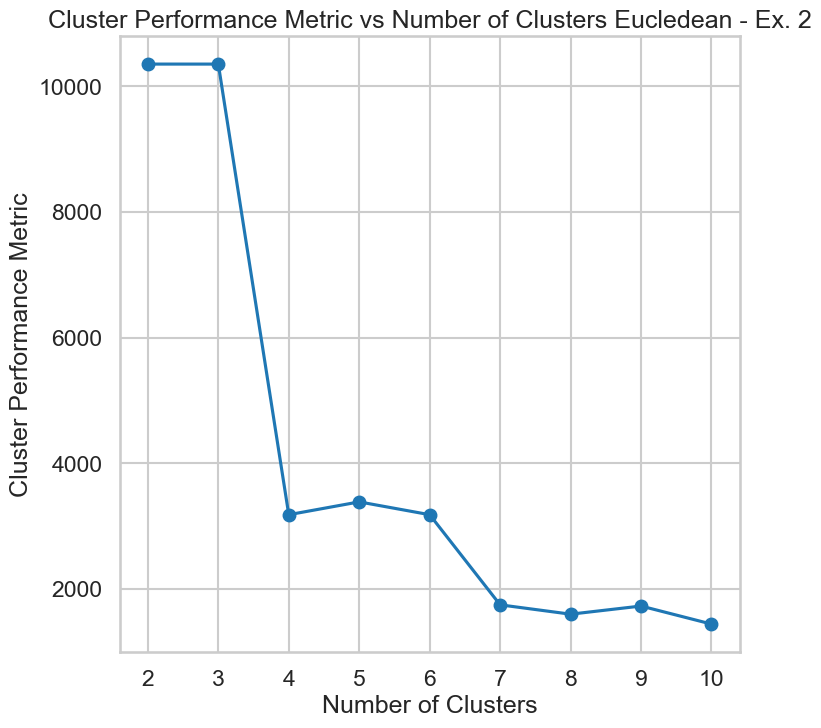

Clustering Ex. 3 with 2 clusters...
[[1.3562810064819968, 0.6098443566120866]]
[[1.3562810064819968, 0.6098443566120866], [-0.07198274267391458, -0.46655867363884573]]
Clustering Ex. 3 with 3 clusters...
[[-0.9802838784057314, -0.282357152630385]]
[[-0.9802838784057314, -0.282357152630385], [0.25018867760922414, 0.2652544708596223]]
[[-0.9802838784057314, -0.282357152630385], [0.25018867760922414, 0.2652544708596223], [1.3846475646353396, 1.1191319559214472]]
Clustering Ex. 3 with 4 clusters...
[[-0.7982506801900043, -0.5460947687570623]]
[[-0.7982506801900043, -0.5460947687570623], [0.7741844667969169, 0.7020263183537347]]
[[-0.7982506801900043, -0.5460947687570623], [0.7741844667969169, 0.7020263183537347], [1.6345293434927273, 1.074342981092768]]
[[-0.7982506801900043, -0.5460947687570623], [0.7741844667969169, 0.7020263183537347], [1.6345293434927273, 1.074342981092768], [2.0848344207303198, 0.026352398457229698]]
Clustering Ex. 3 with 5 clusters...
[[0.07727030735261398, -0.466318

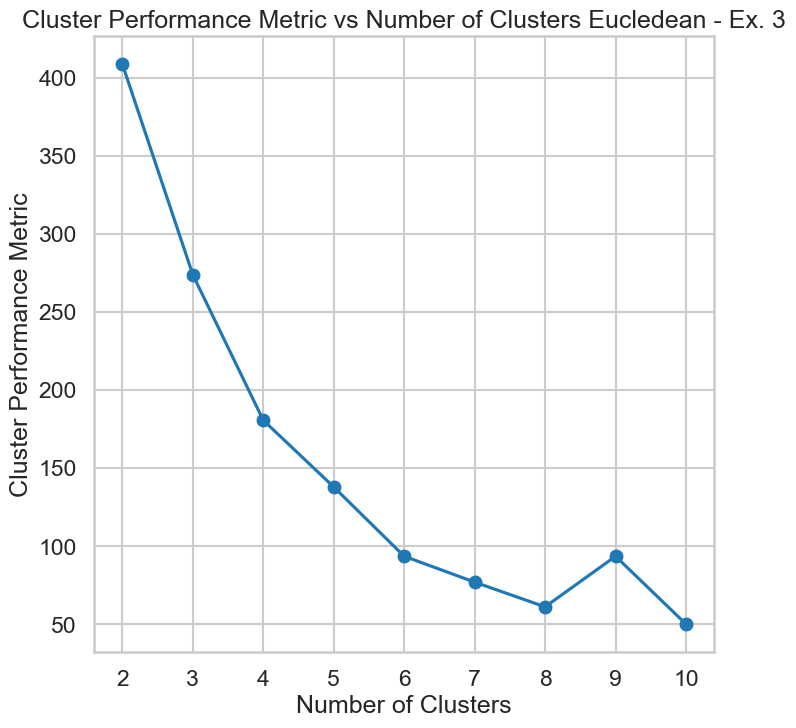

In [120]:
import matplotlib.pyplot as plt

datasets = [(X1, 'Ex. 1'), (X2, 'Ex. 2'), (X3, 'Ex. 3')]

for X, title in datasets:
    metrics = []
    for n_clusters in range(2, 11):
        print(f"Clustering {title} with {n_clusters} clusters...")
        final_cluster_distance, cluster_metric = GUC_Kmean(X, n_clusters, "e")
        metrics.append(cluster_metric)
    
    # Create a new plot for each dataset
    plt.figure()
    
    # Plot cluster performance metric versus number of clusters for the current dataset
    plt.plot(range(2, 11), metrics, marker='o')

    # Add labels and title
    plt.xlabel('Number of Clusters')
    plt.ylabel('Cluster Performance Metric')
    plt.title(f'Cluster Performance Metric vs Number of Clusters Eucledean - {title}')

    # Show grid
    plt.grid(True)

    # Show plot for the current dataset
    plt.show()



## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

Clustering Dataset with 2 clusters...
[[100000103.05507632, 0.3312688802927263, 0.3203262865108316, 72.91481591478228, 2.535462260987161, 140530.26241791376, 0.04953811607849734, 1.6620622279907564]]
[[100000103.05507632, 0.3312688802927263, 0.3203262865108316, 72.91481591478228, 2.535462260987161, 140530.26241791376, 0.04953811607849734, 1.6620622279907564], [100001321.41181812, 0.15236448365130972, 0.9960712710101872, 23.813539370599138, 2.6013436247809887, 116323.21240672209, 0.8707069326503141, 1.5909130535526292]]
Clustering Dataset with 3 clusters...
[[100001355.33920363, 0.9378643744440391, 0.6211403254603832, 23.67298936578506, 2.653081089725851, 246220.64906117928, 1.423740901786644, 0.10746709470747073]]
[[100001355.33920363, 0.9378643744440391, 0.6211403254603832, 23.67298936578506, 2.653081089725851, 246220.64906117928, 1.423740901786644, 0.10746709470747073], [100000793.04926658, 0.16743581945953923, 0.821903908407869, 58.63066012343604, 2.649232791957406, 300221.222147180

Clustering Dataset with 7 clusters...
[[100001230.93757685, 0.7924989056089166, 0.8356460375834757, 46.04062189391935, 2.6435647542283203, 286501.9248350948, 0.5431021908495628, 1.2150907195815885]]
[[100001230.93757685, 0.7924989056089166, 0.8356460375834757, 46.04062189391935, 2.6435647542283203, 286501.9248350948, 0.5431021908495628, 1.2150907195815885], [100001053.6414736, 0.5379457791519024, 0.937663093964562, 35.70094475619568, 2.9503019347037287, 282593.75544783124, 0.9174457772270053, 1.6349065272363323]]
[[100001230.93757685, 0.7924989056089166, 0.8356460375834757, 46.04062189391935, 2.6435647542283203, 286501.9248350948, 0.5431021908495628, 1.2150907195815885], [100001053.6414736, 0.5379457791519024, 0.937663093964562, 35.70094475619568, 2.9503019347037287, 282593.75544783124, 0.9174457772270053, 1.6349065272363323], [100001538.32494165, 0.6778949696185212, 0.31983388938315427, 29.394157525615327, 2.0145830902972746, 266412.1717111814, 0.03250557735473936, 1.2856067506170241]

Clustering Dataset with 9 clusters...
[[100000716.60988979, 0.4351419865163296, 0.5909267255335692, 59.89870808449771, 0.9528956198218385, 125811.37985815929, 0.039383285447407435, 0.08174972018803661]]
[[100000716.60988979, 0.4351419865163296, 0.5909267255335692, 59.89870808449771, 0.9528956198218385, 125811.37985815929, 0.039383285447407435, 0.08174972018803661], [100000516.38556692, 0.7402449976749567, 0.6283138303739122, 62.64776319931441, 2.306758308644465, 270130.6125665193, 1.4406385319737671, 1.9580218380016456]]
[[100000716.60988979, 0.4351419865163296, 0.5909267255335692, 59.89870808449771, 0.9528956198218385, 125811.37985815929, 0.039383285447407435, 0.08174972018803661], [100000516.38556692, 0.7402449976749567, 0.6283138303739122, 62.64776319931441, 2.306758308644465, 270130.6125665193, 1.4406385319737671, 1.9580218380016456], [100001797.75161338, 0.5867171662232342, 0.5881576704911717, 19.987488340429312, 2.995579733125063, 71822.2457115555, 1.480694393263184, 1.6420303902

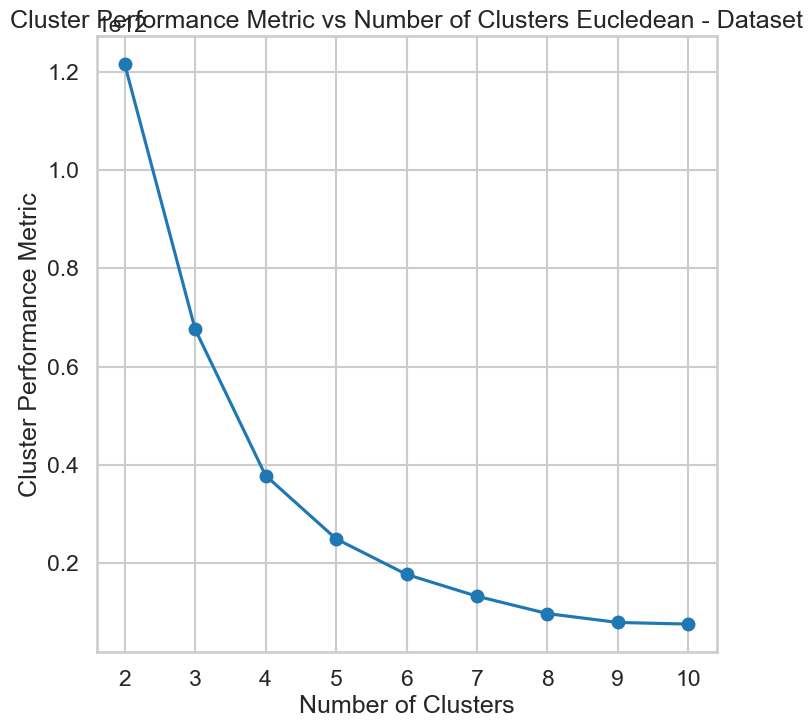

[[100001616.29063131, 0.9270205687863958, 0.11556131360031396, 30.602180395594218, 2.228694876242164, 89444.47831991912, 0.572659093746898, 0.3334831602227253]]
[[100001616.29063131, 0.9270205687863958, 0.11556131360031396, 30.602180395594218, 2.228694876242164, 89444.47831991912, 0.572659093746898, 0.3334831602227253], [100000346.22067562, 0.4815533546282057, 0.10968306211295853, 36.65846187089009, 1.279781728796637, 42546.69540903664, 0.7766663329489052, 0.18824487217103392]]
[[100001616.29063131, 0.9270205687863958, 0.11556131360031396, 30.602180395594218, 2.228694876242164, 89444.47831991912, 0.572659093746898, 0.3334831602227253], [100000346.22067562, 0.4815533546282057, 0.10968306211295853, 36.65846187089009, 1.279781728796637, 42546.69540903664, 0.7766663329489052, 0.18824487217103392], [100000987.66348375, 0.8257381885570964, 0.8184221621817872, 22.66601390116923, 1.8036832730235606, 264118.08223335625, 0.47594508586927065, 1.5238530228991982]]
[[100001616.29063131, 0.927020568

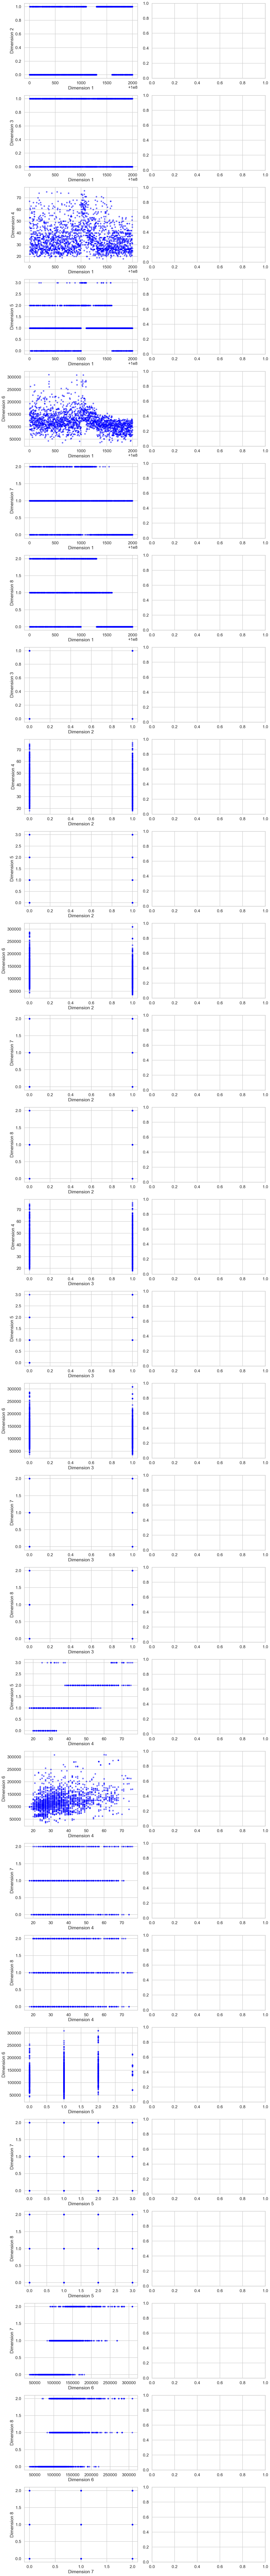

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your CSV dataset
# Replace 'your_dataset.csv' with the path to your CSV file
data = pd.read_csv('Customer data.csv')

# Extract features from the dataset
X = data.values

datasets = [(X, 'Dataset')]

for X, title in datasets:
    metrics = []
    for n_clusters in range(2, 11):
        print(f"Clustering {title} with {n_clusters} clusters...")
        final_cluster_distance, cluster_metric = GUC_Kmean(X, n_clusters, "e")
        metrics.append(cluster_metric)
    
    # Create a new plot for each dataset
    plt.figure()
    
    # Plot cluster performance metric versus number of clusters for the current dataset
    plt.plot(range(2, 11), metrics, marker='o')

    # Add labels and title
    plt.xlabel('Number of Clusters')
    plt.ylabel('Cluster Performance Metric')
    plt.title(f'Cluster Performance Metric vs Number of Clusters Eucledean - {title}')

    # Show grid
    plt.grid(True)

    # Show plot for the current dataset
    plt.show()
km = GUC_Kmean(X, n_clusters, "e")
display_clusterTest(X,km=[], num_clusters=0)

